In [1]:
%reset -f
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from CTR import *
from CTR.PIticks import PIticks
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# from CTR.Atoms import *
from CTR.Atoms import Re, Se, Mo, Si, C
# from brokenaxes import brokenaxes

# import sys
# sys.path.append('../')
# from DFT import DFT 

 CTR v2


In [2]:
XRD = Xray(wavelength=1.5406)
XRD.Q(0,0,1)

array([[0.        , 0.        , 0.0081568 ],
       [0.        , 0.        , 0.01631361],
       [0.        , 0.        , 0.02447041],
       ...,
       [0.        , 0.        , 8.14048934],
       [0.        , 0.        , 8.14864614],
       [0.        , 0.        , 8.15680294]])

In [3]:
rese2 = Molecule(
    lattice = (6.64418, 6.76599, 7.06690, 91.8579, 104.3842, 118.8873),
    structure=(
        Re(0.064471, 0.315421, 0.491575), 
        Re(0.487198, 0.291296, 0.497211),
        Se(0.252667, 0.384044, 0.221090),
        Se(0.725641, 0.342656, 0.253293),
        Se(0.223326, 0.108908, 0.712059),
        Se(0.751740, 0.134689, 0.685320)
    )
)
# blg_cif = Molecule(
#     lattice = (2.46729, 2.46729, 7.80307 / 2, 90, 90, 120),
#     structure =(
#         C(0, 0, 0),
#         C(1/3, 2/3, 0)
# 	)
# )
sic_cif = Molecule(
    lattice = (3.07662, 3.07662, 15.09808, 90, 90, 120),  # cif
    # lattice = (3.0865, 3.0865, 15.1262, 90, 90, 120), # history
    structure=(
		Si(0, 0, 0.499729),
        Si(0, 0, 0.999729),
        Si(1/3, 2/3, 1/6),
        Si(2/3, 1/3, 2/3),
        Si(1/3, 2/3, 0.832986),
        Si(2/3, 1/3, 0.332986),
        C(0, 0, 0.374366),
        C(0, 0, 0.874366),
        C(1/3, 2/3, 0.041522),
        C(2/3, 1/3, 0.541522),
        C(1/3, 2/3, 0.707997),
        C(2/3, 1/3, 0.207997)
	)
)

In [4]:
# print(sic.RJ)
print()
# print((np.array([[-1, 0, 0],[0, -1, 0],[0, 0, 1]]) @ sic.RJ.T).T)

# np.array([[1, 0, 0],[0, -1, 0],[0, 0, -1]]) @ vec(0.1,0.1,0.2) + vec(0,1,1)

MAP1 = (np.array([[1, 0, 0],[0, -1, 0],[0, 0, -1]]) @ sic_cif.RJ.T).T  + vec(0,1,1)
MAP2 = (np.array([[-1, 0, 0],[0, -1, 0],[0, 0, 1]]) @ MAP1.T).T  + vec(1,1,0)

offset = 1-0.958478 + 1 - 0.874855
MAP3 = MAP2 + vec(0,0,offset)

#
MAP3 = np.round(MAP3.astype(float), 6)
MAP3 = np.where(MAP3>1, MAP3-1, MAP3)
MAP3[:,0:2] = np.where(MAP3[:,0:2]==1, 0, MAP3[:,0:2])
print(MAP3)


[[0.       0.       0.666938]
 [0.       0.       0.166938]
 [0.666667 0.666667 1.      ]
 [0.333333 0.333333 0.5     ]
 [0.666667 0.666667 0.333681]
 [0.333333 0.333333 0.833681]
 [0.       0.       0.792301]
 [0.       0.       0.292301]
 [0.666667 0.666667 0.125145]
 [0.333333 0.333333 0.625145]
 [0.666667 0.666667 0.45867 ]
 [0.333333 0.333333 0.95867 ]]


In [5]:
# 0.166938  *  15.09808
# 0.166938  *  15.09808  *  0.7496495704992273
1.91/2.31

0.8268398268398268

In [6]:
# # MIMIC
# sic = Molecule(
#     lattice = (3.0865, 3.0865, 15.1262, 90, 90, 120),
#     structure=(
#         *[Si(*MAP3[i]) for i in range(6)],
# 		*[C(*MAP3[6+i]) for i in range(6)],
# 	)
# )
# buffer = Molecule(
#     lattice = (3.0825, 3.0765, 2.31, 90, 90, 120),
#     structure=(
#         C(0,0,1),
#         C(2/3, 2/3, 1.91/2.31)
# 	)
# )
# blg = Molecule(
#     lattice = (2.4585, 2.4603, 3.20, 90, 90, 120),
#     structure=(
#         C(0,0,1),
#         C(2/3, 2/3, 1)
# 	)
# )
# # vdw = vdW(lattice=sic.lattice*vec(1,1,0.01,1,1,1))

In [7]:
# History
sic = Molecule(
    lattice = (3.0865, 3.0865, 15.1262, 90, 90, 120),
    structure = (
        Si(0,0,1),
		C(0.33333333,0.66666667,0.958197),
		Si(0.33333333,0.66666667,0.833214),
		C(0.66666667,0.33333333,0.791719),
		Si(0.66666667,0.33333333,0.666737),
		C(0,0,0.625371),
		Si(0,0,0.5),
		C(0.66666667,0.33333333,0.458197),
		Si(0.66666667,0.33333333,0.333214),
		C(0.33333333,0.66666667,0.291719),
		Si(0.33333333,0.66666667,0.166737),
		C(0,0,0.125371),
	)
)
buffer = Molecule(
    lattice = (3.0825, 3.0765, 2.31, 90, 90, 120),
    structure=(
        C(2/3,1/3,1),
        C(0, 0, 1.91/2.31)
	)
)
blg = Molecule(
    lattice = (2.4585, 2.4603, 3.20, 90, 90, 120),
    structure=(
        C(0,0,1),
        C(2/3, 1/3, 1)
	)
)

In [8]:
Nx, Ny = 5, 5
SIC = Film(sic, (0.8*Nx, 0.8*Ny, inf))
BUF = Film(buffer, (0.8*Nx,0.8*Ny,1))
BLG = Film(blg, (Nx, Ny, 2))

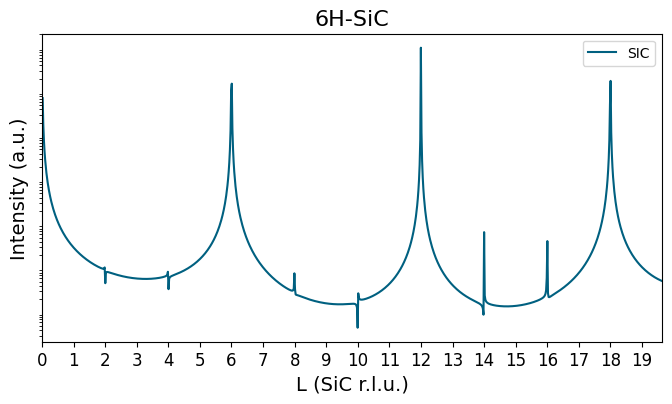

In [9]:
plt.close()
plt.figure(figsize=(8,4))
plt.title('6H-SiC', size=16)
plt.semilogy(XRD.HKL(sic)[:,2], SIC|XRD, label='SIC', color='#006080')
plt.xticks(range(20), size=12)
plt.xlabel("L (SiC r.l.u.)", size=14)
plt.ylabel("Intensity (a.u.)", size=14)
plt.yticks([])
plt.xlim([0, max(XRD.HKL(sic)[:,2])])
plt.legend()

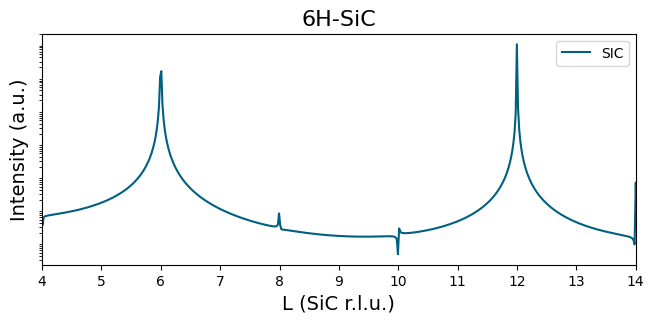

In [10]:
plt.close()
plt.figure(figsize=(7.66,3))
plt.title("6H-SiC", size=16)
plt.semilogy(XRD.HKL(sic)[:,2], SIC|XRD, label='SIC', color='#006080')
plt.xticks(range(20))
plt.xlabel("L (SiC r.l.u.)", size=14)
plt.ylabel("Intensity (a.u.)", size=14)
plt.yticks([])
plt.xlim([4,14])
plt.legend()

(4.0, 14.0)

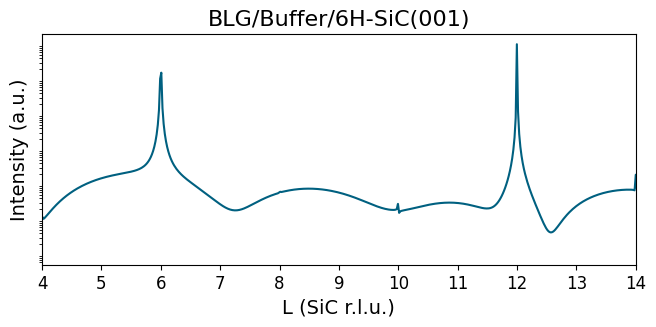

In [11]:
plt.close()
plt.figure(figsize=(7.66,3))
plt.title("BLG/Buffer/6H-SiC(001)", size=16)
plt.semilogy(XRD.HKL(sic)[:,2], BLG/BUF/SIC(0,0,1)|XRD, label='β=0', color='#006080', linestyle='-')
plt.xticks(range(20), size=12)
plt.xlabel('L (SiC r.l.u.)', size=14)
plt.ylabel('Intensity (a.u.)', size=14)
plt.yticks([])
plt.xlim([4,14])
# plt.legend()

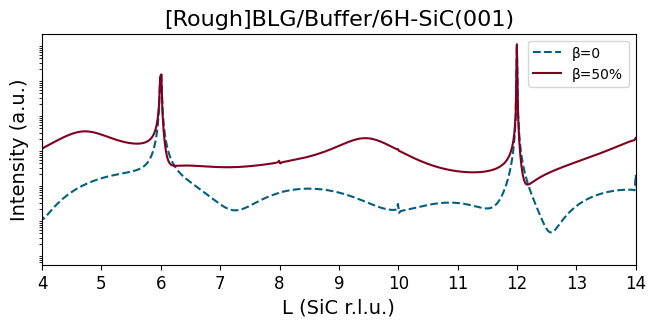

In [12]:
beta = 50
BLG_R = RoughCut(blg, (Nx, Ny, 2), beta/100)
plt.close()
plt.figure(figsize=(7.66,3))
plt.title("[Rough]BLG/Buffer/6H-SiC(001)", size=16)
# plt.semilogy(XRD.HKL(sic)[:,2], BLG_R|XRD, label='Rough', color='#006080', linestyle='--')
plt.semilogy(XRD.HKL(sic)[:,2], BLG/BUF/SIC(0,0,1)|XRD, label='β=0', color='#006080', linestyle='--')
plt.semilogy(XRD.HKL(sic)[:,2], BLG_R/BUF/SIC(0,0,1)|XRD, label=f'β={beta:.0f}%', color='#800020')

plt.xticks(range(20), size=12)
plt.xlabel('L (SiC r.l.u.)', size=14)
plt.ylabel('Intensity (a.u.)', size=14)
plt.yticks([])
plt.xlim([4,14])
plt.legend()

In [13]:
'Rough' in str((BLG_R/BUF/SIC(0,0,1)).film[0].__class__)

True